# 1. Normallik Testleri
- Veri setinin dağılımının normal olup olmadığını test etmek için kullanılır.
- Dağılım normal ise parametrik değilse non-parametrik testler kullanılır.
- Veriler normal dağılmasa bile parametrik testlerin kullanılması _Merkezi Limit Teoremi_ ile mümkündür.Merkezi limit teoremine göre , normal dağılıma sahip olmasak bile , 30 ya da daha fazla gözleme sahipsek parametrik testleri kullanabiliriz.
- Parametrik testler çok daha güçlüdür.
- Parametrik olmayan testler dağılımla ilgilenmezler, bu testler için gözlem sayısı esastır. Sıra puanları üzerinden değerlendirme yaparlar.

#### Kullanılacak Normallik Testleri
- Shapiro-Wilk Testi
- D'Agostino'nun K^2 Testi
- Anderson-Darling Testi

## 1)Shapiro-Wilk Testi

- Standart sapma ile normalliği değerlendirir.Verilerin standart sapmasını, veriler için hesaplanan Q-Q grafiğinin eğiminden hesaplanan standart sapma ile karşılaştırır ve oran hesaplar.Veriler Gauss dağılımından alınmışsa 2 değer benzer olur, oran 1 e yaklaşır.
- Ratgele örneklemin normal dağılıp dağılmadığını test etmek amacıyla kullanılır.
- Hipotezler şu şekilde kurulur:
- **H0:** Veri seti dağılımı normaldir.
- **H1:** Veri seti dağılımı normal değildir.
- Testin önem değeri olan p değeri testten önce belirtilen α değerinden küçükse H0 reddedilir.
- Örnek sorular üzerinden gidelim.

In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
# Veri setini yükleyin
df = pd.read_csv("Housing.csv")
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


**Soru1:** Veri setindeki _price_ değişkeni α=0.05 anlamlılık düzeyinde normal dağılıma sahip midir?

- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [31]:
# Price değişkenini seçin
price = df["price"]

In [37]:
from scipy.stats import shapiro
w_stat,p_value1 = stats.shapiro(price)
print('stat=%.3f, p=%.3f' % (w_stat, p_value1))

stat=0.922, p=0.000


In [58]:
#Sonucu yorumlama
alpha = 0.05
if p_value1>alpha:
    print("H0 kabul edilir,veri normal dağılmıştır.")
else:
    print("H0 reddedilir,veri normal dağılmamıştır.")

H0 reddedilir,veri normal dağılmamıştır.


**Soru 2 :** Bir şirketin çalışanlarının maaşları aşağıda verilmiştir. Çalışan maaşları  α=0.05 anlamlılık düzeyinde normal dağılıma uygun mudur?

In [53]:
maaslar = np.array([
    45000, 54000, 58000, 49000, 52000, 61000, 48000, 47000, 53000, 50000,
    46000, 57000, 55000, 60000, 49000, 53000, 52000, 56000, 54000, 61000
])

In [56]:
w_stat2,p_value2 = stats.shapiro(maaslar)
print('stat=%.3f, p=%.3f' % (w_stat2, p_value2))

stat=0.964, p=0.622


In [60]:
#Sonucu yorumlama
alpha = 0.05
if p_value2>alpha:
    print("H0 kabul edilir,veri normal dağılmıştır.")
else:
    print("H0 reddedilir,veri normal dağılmamıştır.")

H0 kabul edilir,veri normal dağılmıştır.


## 2)D'Agostino'nun K^2 Testi
- Dağılımın asimetri ve şekil açısından Gauss dağılımına ne kadar uzakta olduğunu ölçmek için önce çarpıklığı ve basıklığı hesaplar.Daha sonra bu derğerden her birinin Gauss dağılımında beklenen değerden ne kadar farklı olduğunu hesaplar.Bu tutarsızlıkların toplamında tek bir p değeri döndürür.
- Hipotezler şu şekilde kurulur:
- **H0:** Veri seti dağılımı normaldir.
- **H1:** Veri seti dağılımı normal değildir.
- Testin önem değeri olan p değeri testten önce belirtilen α değerinden küçükse H0 reddedilir.
- Örnek sorular üzerinden gidelim.

In [76]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df.head(3)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


**Soru 3:** Kilo-Boy veri setindeki _Height_ değişkeni α=0.05 anlamlılık düzeyinde normal dağılıma sahip midir?

- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır

In [108]:
# Height değişkenini seçelim
boy = df['Height(Inches)'].dropna()

In [85]:
# D'Agostino'nun K² testi
from scipy.stats import normaltest
stat_d, p3 = normaltest(boy)
print('stat=%.3f, p=%.3f' % (stat_d, p3))

stat=1.433, p=0.488


In [87]:
#Sonucu yorumlama
if p3 > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

H0 kabul edilir.Veri normal dağılmıştır.


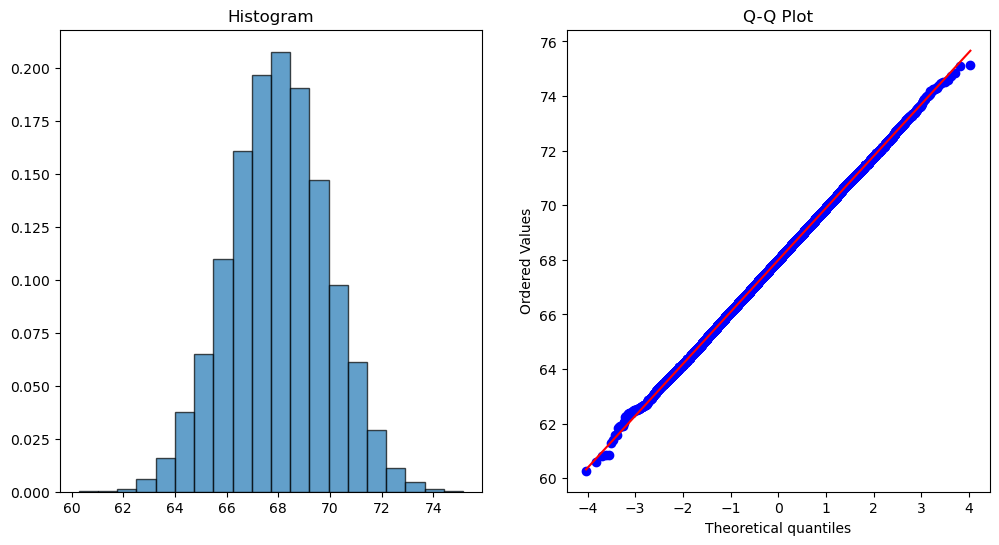

In [101]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(boy, bins=20, edgecolor='k', alpha=0.7, density=True);
plt.title("Histogram")

plt.subplot(1, 2, 2)
stats.probplot(boy, dist="norm", plot=plt);
plt.title("Q-Q Plot")

plt.show()

**Soru 4:** Kilo-Boy veri setindeki _Weight_ değişkeni α=0.05 anlamlılık düzeyinde normal dağılıma sahip midir?

- **H0:** Veri normal dağılmıştır.
- **H1:** Veri normal dağılmamıştır.

In [112]:
# Weight değişkenini seçelim
kilo = df['Weight(Pounds)'].dropna()

In [114]:
# D'Agostino'nun K² testi
from scipy.stats import normaltest
stat_d1, p4 = normaltest(kilo)
print('stat=%.3f, p=%.3f' % (stat_d1, p4))

stat=4.865, p=0.088


In [116]:
#Sonucu yorumlama
if p4 > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

H0 kabul edilir.Veri normal dağılmıştır.


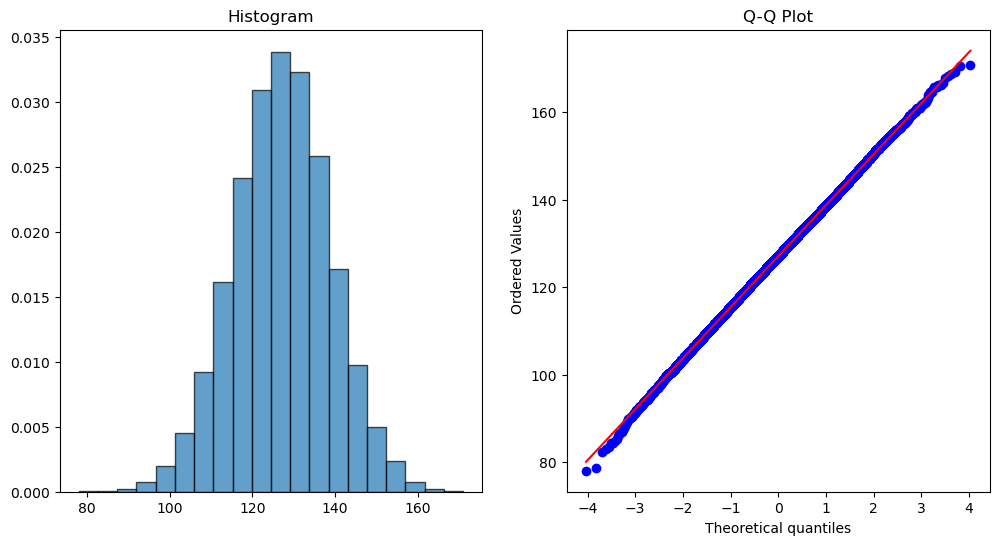

In [118]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(kilo, bins=20, edgecolor='k', alpha=0.7, density=True);
plt.title("Histogram")

plt.subplot(1, 2, 2)
stats.probplot(kilo, dist="norm", plot=plt);
plt.title("Q-Q Plot")

plt.show()

## 3)Anderson-Darling Testi
- Anderson-Darling testi, tek bir p değeri yerine kritik değerlerin bir listesini döndürür. Bu, sonucun daha kapsamlı bir şekilde yorumlanması için temel sağlayabilir.
- Test İstatistiği ve Kritik Değerler: Anderson-Darling testi, belirli bir test istatistiği ve seçilen anlamlılık düzeylerine göre kritik değerler sunar. Kritik değerler, farklı anlamlılık düzeyleri için tablolar halinde bulunabilir (örneğin, %1, %5, %10).
- Hipotezler şu şekilde kurulur:
- **H0:** Veri seti dağılımı normaldir.
- **H1:** Veri seti dağılımı normal değildir.
- Test İstatistiği ≥ Kritik Değer: Sıfır hipotezini reddederiz. Bu durumda, verinin normal dağılıma uygun olmadığı sonucuna varabiliriz.
- Yani normal dağılım şartı için test istatistiği kritik değerden küçük olmalı.
- Örnek sorular üzerinden gidelim.

In [125]:
df = pd.read_excel("USA GDP Growth 1961-2021.xlsx")
df.head(3)

,Year,GDP,GDP per Capita,Growth
0,2021,"$22,996.10B",69288,0.0567
1,2020,"$20,893.74B",63028,-0.0340
2,2019,"$21,372.57B",65095,0.0229


In [127]:
#Bu veri seti, Amerika Birleşik Devletleri'nin 1960'lardan 2021'e kadar olan Büyüme Oranına ilişkin bir Veri Setidir ve Ekonomisindeki iniş çıkışları gösterir. 

**Soru 5 :** Amerika Birleşik Devletleri'nin 1960-2021 dönemindeki ekonomik büyüme oranlarının normal dağılıma uyup uymadığını test ediniz.

In [132]:
from scipy.stats import anderson

In [134]:
# Growth değişkenini seçelim
buyume_orani = df['Growth'].dropna()

In [138]:
# Anderson-Darling Testi
result = anderson(buyume_orani)
print('Statistic: %.3f' % result.statistic)

Statistic: 0.653


In [157]:
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.544, data does not look normal (reject H0)
10.000: 0.620, data does not look normal (reject H0)
5.000: 0.743, data looks normal (fail to reject H0)
2.500: 0.867, data looks normal (fail to reject H0)
1.000: 1.031, data looks normal (fail to reject H0)


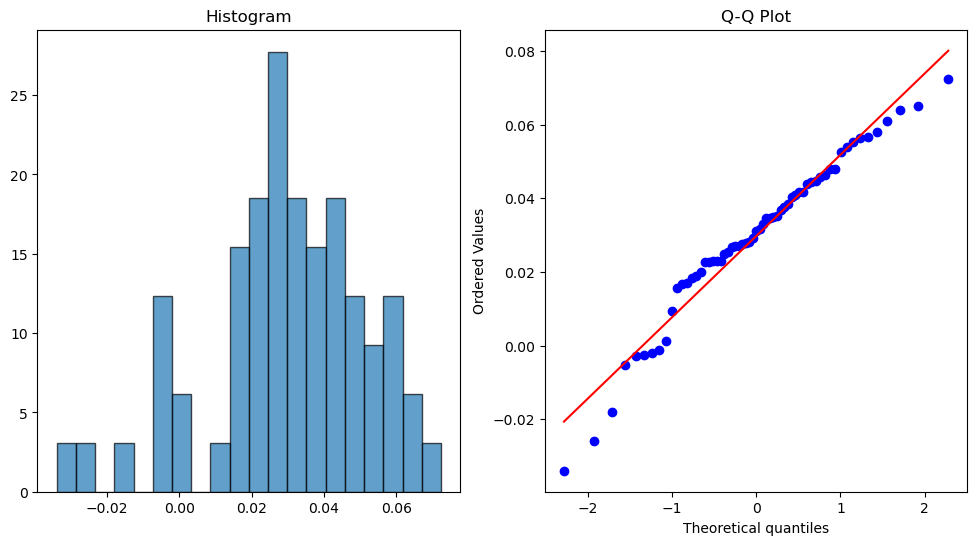

In [148]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(buyume_orani, bins=20, edgecolor='k', alpha=0.7, density=True);
plt.title("Histogram")

plt.subplot(1, 2, 2)
stats.probplot(buyume_orani, dist="norm", plot=plt);
plt.title("Q-Q Plot")

plt.show()

**Soru 6:** Amerika Birleşik Devletleri'nin 1960-2021 dönemindeki kişi başına düşen gelir verilerinin normal dağılıma uyup uymadığını test ediniz.

In [151]:
# GDP per Capita değişkenini seçelim
kisi_basi_geliri = df['GDP per Capita'].dropna()

In [165]:
# Anderson-Darling Testi
result2 = anderson(kisi_basi_geliri)
print('Statistic: %.3f' % result.statistic)

Statistic: 1.473


In [167]:
p=0
for i in range(len(result2.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.544, data does not look normal (reject H0)
10.000: 0.620, data does not look normal (reject H0)
5.000: 0.743, data does not look normal (reject H0)
2.500: 0.867, data does not look normal (reject H0)
1.000: 1.031, data does not look normal (reject H0)


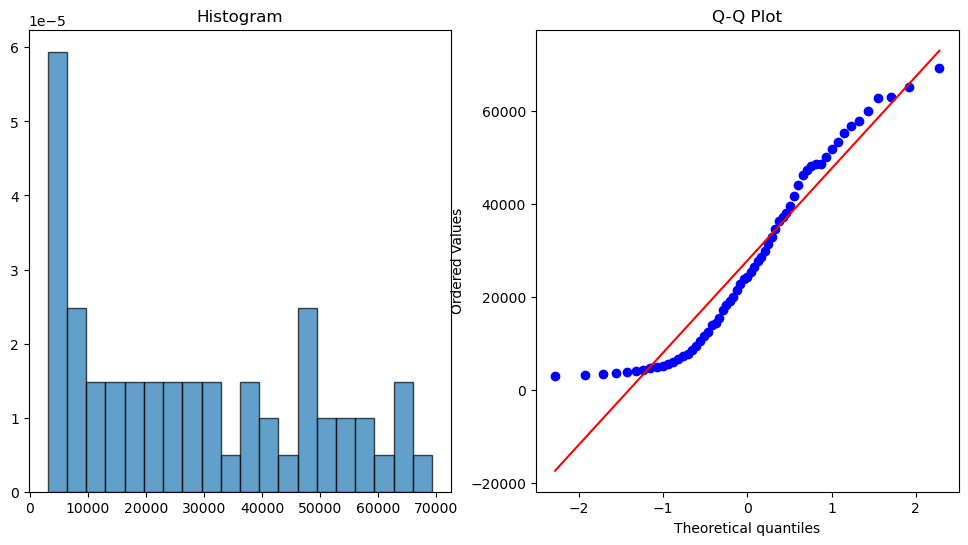

In [171]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(kisi_basi_geliri, bins=20, edgecolor='k', alpha=0.7, density=True);
plt.title("Histogram")

plt.subplot(1, 2, 2)
stats.probplot(kisi_basi_geliri, dist="norm", plot=plt);
plt.title("Q-Q Plot")

plt.show()